In [9]:
import numpy as np
import pandas as pd
#from matplotlib import pyplott as plt
from matplotlib import pyplot as plt

In [2]:
!pip install matplotlib

In [10]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [11]:
# Reading csv file using pandas
titanic_ds = pd.read_csv(r"C:\Users\aezhi\.jupyter\titanic.csv")

In [12]:
# creating 2nd dataframe
titanic_ds1 = pd.DataFrame(titanic_ds)
titanic_ds1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# drop duplicates from the dataset
titanic_ds1.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
# counting the null values in dataset
titanic_ds1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# describing standard values of the dataset
titanic_ds1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='age'>

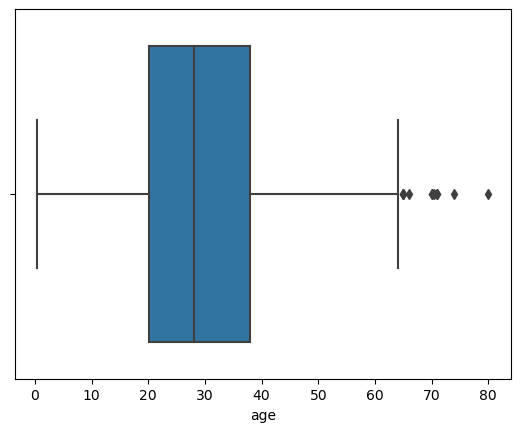

In [16]:
# creating box plot to check the outliers

import seaborn as sns
sns.boxplot(x = 'age',data=titanic_ds1)

In [17]:
# getting the different quantile values
print(titanic_ds1['age'].quantile(0.5))
print(titanic_ds1['age'].quantile(0.95))
print(titanic_ds1['age'].quantile(0.75))

28.0
56.0
38.0


In [18]:
# minimizing the outliers with 75% of quantile value
titanic_ds1['age'] = np.where(titanic_ds1['age'] > 56.0,38.0,titanic_ds1['age'])

In [19]:
titanic_ds1['age'].describe()

count    714.000000
mean      28.460322
std       12.495745
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       56.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

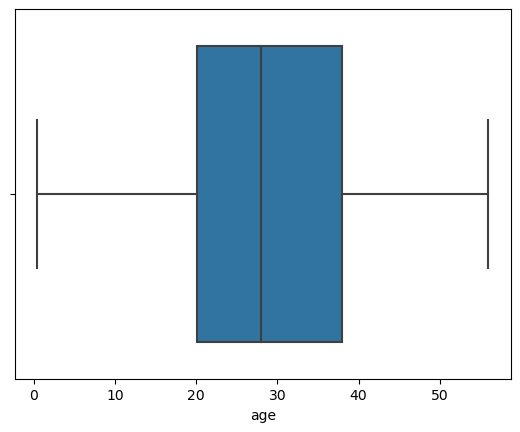

In [16]:
sns.boxplot(x = 'age' , data = titanic_ds1)

In [ ]:
titanic_ds1.fillna(method='ffill')  # filling Nan with forwarded value in the dataset

In [ ]:
titanic_ds1.fillna(method='bfill') # filling the Nan with backward value in the dataset

In [20]:
# filling the null with median and mode value
titanic_ds1['age'] = titanic_ds1['age'].fillna(titanic_ds1['age'].median())  #replacing NAN of age with - median value of age,
titanic_ds1['deck'] = titanic_ds1['deck'].fillna(titanic_ds1['deck'].mode()[0])  #replacing deck value by mode


In [21]:
titanic_ds1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [22]:
titanic_ds1.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,C,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,C,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,C,Queenstown,no,True


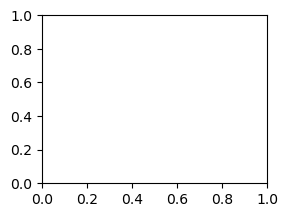

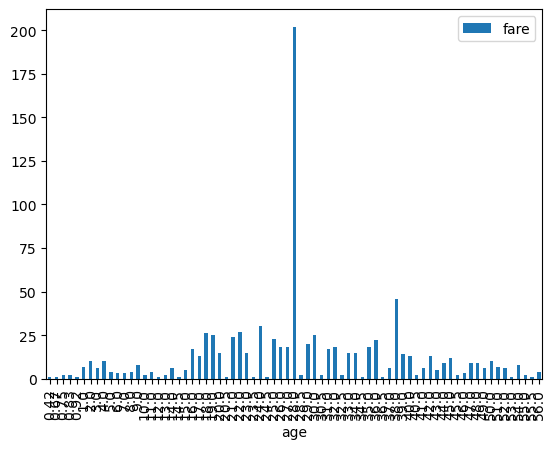

<AxesSubplot:ylabel='sex'>

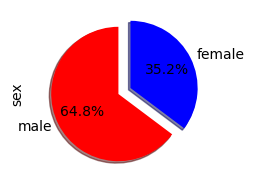

In [23]:
# plotting bar chart using groupby of age and fare
plt.subplot(2,2,1)
titanic_ds1.groupby(['age']).count().plot(y='fare',kind='bar')
plt.show()
plt.subplot(2,2,2)
titanic_ds1.sex.value_counts().plot(y='survived',startangle=90,explode=[0,0.2],kind='pie',shadow = True,colors = ['Red','Blue'],autopct = '%2.1f%%' )

Text(0.5, 1.0, 'Population survey')

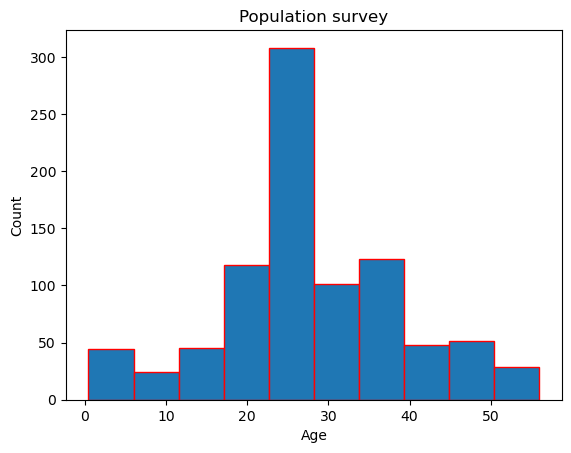

In [36]:
# plotting histogram
plt.hist(titanic_ds1['age'],ec = 'red') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Population survey")

Text(0.5, 1.0, 'Percentage of Sex')

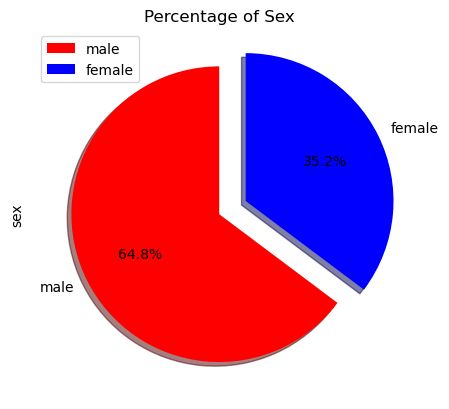

In [100]:
# plotting Pie chart
titanic_ds1.sex.value_counts().plot(y='survived',startangle=90,explode=[0,0.2],kind='pie',shadow = True,colors = ['Red','Blue'],autopct = '%2.1f%%' )
plt.legend()
plt.title('Percentage of Sex')

Text(0.5, 1.0, 'Scatter Plot using Age and Fare')

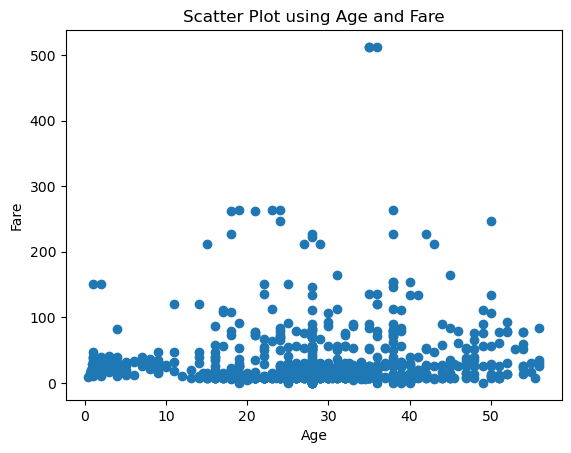

In [25]:
# plotting bi variant scattered chart

plt.scatter(titanic_ds1['age'],titanic_ds1['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot using Age and Fare')

C:\Users\aezhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Voilin Plot')

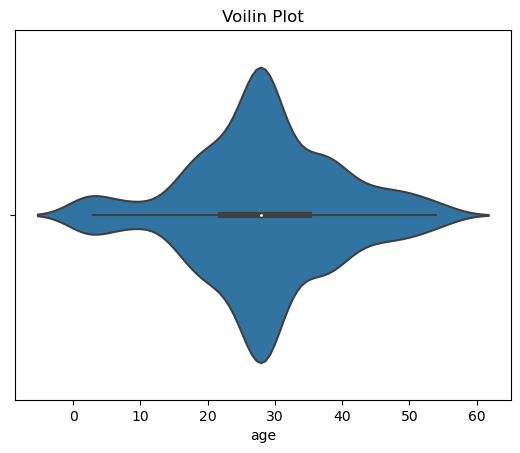

In [26]:
# plotting violin graph
sns.violinplot(titanic_ds1['age'])
plt.title('Voilin Plot')

In [74]:
# plotting heat map for better correlation understanding
titanic_ds2.corr().style.background_gradient(cmap='coolwarm')

C:\Users\aezhi\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\aezhi\anaconda3\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,0.612372,0.487950,-0.166667,nan,-0.331866,-1.000000,0.166667
pclass,0.612372,1.000000,0.597614,-0.612372,nan,-0.842778,-0.612372,0.612372
age,0.487950,0.597614,1.000000,-0.894575,nan,-0.574962,-0.487950,0.894575
sibsp,-0.166667,-0.612372,-0.894575,1.000000,nan,0.759509,0.166667,-1.000000
parch,nan,nan,nan,nan,nan,nan,nan,nan
fare,-0.331866,-0.842778,-0.574962,0.759509,nan,1.000000,0.331866,-0.759509
adult_male,-1.000000,-0.612372,-0.487950,0.166667,nan,0.331866,1.000000,-0.166667
alone,0.166667,0.612372,0.894575,-1.000000,nan,-0.759509,-0.166667,1.000000
